# CNN model to classify facial emotion using images

## Importing the Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

## Data preprocessing

## Preprocessing the training data

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('archive/train',
                                                 target_size = (48, 48),
                                                 batch_size = 32,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


## Preprocessing the test data

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('archive/test',
                                            target_size = (48, 48),
                                            batch_size = 32,
                                            color_mode="grayscale",
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


## Datasets information

In [4]:
training_set[0][0].shape

(32, 48, 48, 1)

In [5]:
training_set[0][1].shape

(32, 7)

In [6]:
test_set[0][0].shape

(32, 48, 48, 1)

In [11]:
for each in training_set:
     print(each[0].shape)
     print(each[1].shape)
     break

(32, 48, 48, 1)
(32, 7)


In [25]:
def images(x, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(x[index])

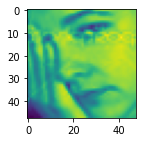

In [26]:
images(training_set[0][0] , 0)

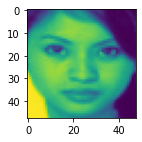

In [29]:
images(training_set[1][0], 10)

## Building CNN model

In [30]:
cnn = models.Sequential()

### First convolutional layer

In [31]:
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (48, 48, 1)))

### First pooling layer 

In [32]:
cnn.add(layers.MaxPool2D(pool_size = 2, strides = 2))

### Second convolutional and pooling layer

In [33]:
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn.add(layers.MaxPool2D(pool_size = 2, strides = 2))

### Flattened Layer 

In [34]:
cnn.add(layers.Flatten())

### Full connected layer or hidden layer

In [35]:
cnn.add(layers.Dense(64, activation='relu'))

### Output layer

In [36]:
cnn.add(layers.Dense(7, activation='softmax'))

## Training the CNN

In [44]:
cnn.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
cnn_info = cnn.fit(
                training_set,
                steps_per_epoch = 28709 // 32,
                epochs=1,
                validation_data = test_set,
                validation_steps = 7178 // 32)

897/897 [==============================] - 222s 244ms/step - loss: 1.6774 - accuracy: 0.3311 - val_loss: 1.5237 - val_accuracy: 0.4185
